In [1]:
import pickle, json, collections, itertools
from zipfile import ZipFile
from datetime import datetime
from tqdm import tqdm_notebook as tqdm
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

# Read data

In [15]:
df = pd.read_csv('android_bids_us.csv')
df["day"] = df.utc_time.apply(lambda t: t//(1000*60*60*24))
df["week"] = df.utc_time.apply(lambda t: t//(1000*60*60*24*7))
df

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click,day,week
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,1536444331894,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,NaN,7.0,720,1280,chartboost,0,17782,2540
1,9284441f-a6ea-4698-9017-86436b92d416,1536444363932,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,NaN,7.0,1280,720,chartboost,0,17782,2540
2,7e4779c2-f757-4324-8c2a-138b558b5a54,1536444386908,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,NaN,7.1.1,720,1280,chartboost,0,17782,2540
3,b64ea208-38ca-42ac-895e-0842d7352cc3,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,NaN,6.0.1,720,1280,chartboost,0,17782,2540
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,1536444443458,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,NaN,7.1.1,1024,768,chartboost,0,17782,2540
5,234541bb-9183-493e-8ad7-0d86fe619b15,1536444487429,com.kick.trucks.manual.shift.driving,FL,T-Mobile USA,NaN,NaN,7.0,720,1280,chartboost,0,17782,2540
6,31d4270d-32e8-441a-95e4-6a27ca21a356,1536444496213,com.slots.realvegas2,FL,Spectrum,NaN,NaN,7.1.1,720,1280,chartboost,0,17782,2540
7,3259e135-743b-48d9-b2e6-71707a2a9013,1536444316772,bitcoin.blockchain.game,GA,Sprint PCS,NaN,NaN,8.0.0,1920,1080,chartboost,0,17782,2540
8,9d897068-12a8-4a77-b12f-3150ffa9a6dd,1536444329288,com.feelingtouch.zf3d,ME,Spectrum,NaN,NaN,8.0.0,918,1887,chartboost,0,17782,2540
9,eba79a5a-a33b-4e54-af28-cad9b21d0739,1536444355834,com.ffgames.driftstar,UT,Comcast Cable,NaN,NaN,7.0,1440,2672,chartboost,0,17782,2540


# Tracking continous variables
## Track CTR over time

In [9]:
ctr_ts = df.pivot_table(values="bidid", columns="click", index="day", aggfunc=len)
ctr_ts["ctr"] = (ctr_ts[1] /(ctr_ts[0] + ctr_ts[1])).fillna(0)
ctr_ts

click,0,1,ctr
day,,,
17749,1920.0,87.0,0.043348
17750,2221.0,111.0,0.047599
17751,11639.0,579.0,0.047389
17752,11881.0,630.0,0.050356
17753,12823.0,656.0,0.048668
17754,13011.0,709.0,0.051676
17755,13091.0,700.0,0.050758
17756,32586.0,1462.0,0.042939
17757,32306.0,1495.0,0.044229


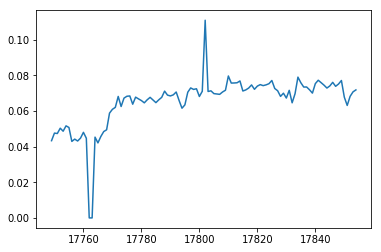

In [10]:
plt.plot(ctr_ts.index,ctr_ts.ctr)

We would need to set a threshold of appecptible change.

This threshold is usually set empircally

## Tracking categorical variables

Using total [Total variation distance](https://en.wikipedia.org/wiki/Total_variation_distance_of_probability_measures).

Total variation distance (TVD) is essentially a measure of probability mass that moved from one category to the other.

For example, if this is the gender distribution:
1. 2013: 50% Male, 50% Female
2. 2014: 48% Male, 52% Female

Then the TVD is 2%, since 2% moved from one category to an other,

In the general case, the distance between two distributions is
$$TVD(p,q) = \frac{\sum_{i=1}^{i=n}{|p_i-q_i|}}{n}$$

In [17]:
state_ts = df.pivot_table(values="bidid", columns="user_state", index="week", aggfunc=len)
state_ts

user_state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
week,,,,,,,,,,,,,,,,,,,,,
2535,13.0,208.0,99.0,237.0,1880.0,326.0,92.0,100.0,28.0,1272.0,...,47.0,371.0,1900.0,172.0,338.0,19.0,394.0,238.0,60.0,18.0
2536,158.0,1751.0,628.0,2666.0,20735.0,2607.0,890.0,970.0,309.0,10573.0,...,302.0,2960.0,17774.0,1490.0,2900.0,129.0,4010.0,2136.0,414.0,195.0
2537,149.0,1583.0,587.0,2081.0,15668.0,2134.0,744.0,819.0,250.0,8738.0,...,215.0,2629.0,13726.0,1171.0,2300.0,92.0,3474.0,1781.0,413.0,157.0
2538,176.0,2442.0,872.0,3049.0,21301.0,3033.0,1043.0,1290.0,333.0,14352.0,...,320.0,4092.0,19700.0,1446.0,3261.0,139.0,5078.0,2787.0,575.0,185.0
2539,195.0,3432.0,1183.0,3818.0,25429.0,3586.0,1233.0,1775.0,427.0,17637.0,...,326.0,5499.0,26554.0,1715.0,3885.0,165.0,5607.0,3153.0,743.0,223.0
2540,173.0,2850.0,977.0,3168.0,21490.0,2966.0,1059.0,1503.0,373.0,14262.0,...,240.0,4492.0,21657.0,1363.0,3173.0,130.0,4030.0,2242.0,590.0,161.0
2541,162.0,2851.0,999.0,2835.0,19609.0,3070.0,1086.0,1572.0,331.0,15216.0,...,254.0,4657.0,21646.0,1259.0,3572.0,132.0,3737.0,2169.0,621.0,181.0
2542,186.0,3360.0,1163.0,3485.0,24449.0,3716.0,1151.0,1783.0,384.0,17386.0,...,305.0,5231.0,25945.0,1480.0,3773.0,159.0,4443.0,2382.0,690.0,219.0
2543,301.0,6223.0,2319.0,7060.0,45350.0,7396.0,2553.0,3427.0,756.0,32912.0,...,633.0,10260.0,50653.0,2911.0,7576.0,305.0,8178.0,5121.0,1197.0,364.0


Calculating prior distribution

In [38]:
prior_dist_ds = state_ts.sum()/state_ts.sum().sum()
prior_dist_df = pd.concat([prior_dist_ds for i in state_ts.index], axis=1).T
prior_dist_df.index = state_ts.index
prior_dist_df

user_state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
week,,,,,,,,,,,,,,,,,,,,,
2535,0.000998,0.01499,0.005958,0.017063,0.125317,0.014169,0.004213,0.008543,0.001329,0.083589,...,0.001523,0.021289,0.130006,0.007886,0.013451,0.000841,0.023921,0.008926,0.003265,0.001046
2536,0.000998,0.01499,0.005958,0.017063,0.125317,0.014169,0.004213,0.008543,0.001329,0.083589,...,0.001523,0.021289,0.130006,0.007886,0.013451,0.000841,0.023921,0.008926,0.003265,0.001046
2537,0.000998,0.01499,0.005958,0.017063,0.125317,0.014169,0.004213,0.008543,0.001329,0.083589,...,0.001523,0.021289,0.130006,0.007886,0.013451,0.000841,0.023921,0.008926,0.003265,0.001046
2538,0.000998,0.01499,0.005958,0.017063,0.125317,0.014169,0.004213,0.008543,0.001329,0.083589,...,0.001523,0.021289,0.130006,0.007886,0.013451,0.000841,0.023921,0.008926,0.003265,0.001046
2539,0.000998,0.01499,0.005958,0.017063,0.125317,0.014169,0.004213,0.008543,0.001329,0.083589,...,0.001523,0.021289,0.130006,0.007886,0.013451,0.000841,0.023921,0.008926,0.003265,0.001046
2540,0.000998,0.01499,0.005958,0.017063,0.125317,0.014169,0.004213,0.008543,0.001329,0.083589,...,0.001523,0.021289,0.130006,0.007886,0.013451,0.000841,0.023921,0.008926,0.003265,0.001046
2541,0.000998,0.01499,0.005958,0.017063,0.125317,0.014169,0.004213,0.008543,0.001329,0.083589,...,0.001523,0.021289,0.130006,0.007886,0.013451,0.000841,0.023921,0.008926,0.003265,0.001046
2542,0.000998,0.01499,0.005958,0.017063,0.125317,0.014169,0.004213,0.008543,0.001329,0.083589,...,0.001523,0.021289,0.130006,0.007886,0.013451,0.000841,0.023921,0.008926,0.003265,0.001046
2543,0.000998,0.01499,0.005958,0.017063,0.125317,0.014169,0.004213,0.008543,0.001329,0.083589,...,0.001523,0.021289,0.130006,0.007886,0.013451,0.000841,0.023921,0.008926,0.003265,0.001046


A standard way to evaluate change in distribution, is the [total variation distance](https://en.wikipedia.org/wiki/Total_variation_distance_of_probability_measures)

In [44]:
total_variation_distance = np.abs(state_ts-prior_dist_df).sum(axis=1) / state_ts.shape[1]
total_variation_distance

week
2535     324.627451
2536    3017.588235
2537    2415.705882
2538    3546.745098
2539    4443.254902
2540    3640.176471
2541    3649.549020
2542    4225.450980
2543    8053.196078
2544    6233.058824
2545    4795.335603
2546    4082.354495
2547    4244.414086
2548    3631.882353
2549    2874.196078
2550    2563.882353
dtype: float64

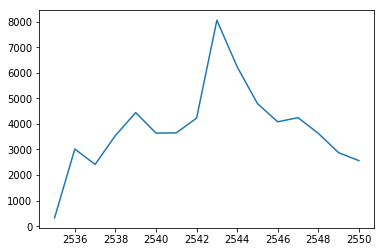

In [45]:
plt.plot(total_variation_distance.index, total_variation_distance)

# Summary
## What should we monitor ?

1. **Input features** : state distribution, device makers, etc
1. **Output score** : output of out prediction model
1. **White box** : Monitor changes in the coefficients of the model


## Exercise:
Plot the `total_variation_distance` of the `user_isp` for October.

Monitor the following providers: AT&T, Verizon, Comcast, Sprint, Spectrum and T-mobile.

All other provider should be labelled as "Other".

Use one week of data as a prior distribution, and the following day as the test data (you should have 31 points).